In [1]:
# !jupyter nbconvert theory.ipynb --to slides --post serve

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from  sklearn import linear_model
from sklearn import datasets

## TOC:
* [Introductie en supervised learning](#week1)
    * [Wat is machine learning ?](#machinelearning)
    * [Verschillende vormen van machine learning](#vormenvan)
    * [Supervised Learning](#supervised-learning)
    * [Lineare Regressie](#lineaire-regressie)
    * [KNN](#knn)
    * [Euclidean Distance](#euclidean-distance)
    * [Similariteit en afstand zijn sleutelbegrippen in ML](#similariteit)
* [Unsupervised learning](#week2)
* [Evaluatie](#week3)
* [Supervised machine learning: lineaire regressie](#week5)
    * [Wat is regressie?](#regressie)
    * [De beste lijn vinden](#bestelijn)
    * [Data transformatie](#data_transformatie)
    * [Algoritme stappen](#algoritme_stappen)
    * [Grid Search](#grid_search)
    * [Cross validation](#cross_validation)
    * [Gradient descent](#gradient_descent)
    * [Wat hebben we gedaan? Lineare Regressie](#afronding_regressie)
* [Supervised machine learning: classification](#week6)
* [Neural networks & wrap up course](#week7)


### Week 1 belangrijke functies
* from sklearn.model_selection import train_test_split
* from sklearn.neighbors import KNeighborsClassifier
* from sklearn.metrics import mean_squared_error
* from sklearn.metrics import r2_score
* from sklearn.preprocessing import Normalizer
* from sklearn.preprocessing import StandardScaler

### Week 2 belangrijke functies
* from sklearn.preprocessing import MinMaxScaler
* from sklearn.preprocessing import RobustScaler
* from sklearn.cluster import DBSCAN
* from sklearn.decomposition import PCA
* from sklearn.decomposition import NMF

### Week 3 belangrijke functies
* from sklearn.metrics import recall_score
* from sklearn.metrics import precision_score
* from sklearn.metrics import accuracy_score
* from sklearn.metrics import f1_score
* from sklearn.model_selection import cross_val_score

### Week 5 belangrijke functies
* from sklearn import linear_model
* from sklearn.linear_model import LinearRegression
* from sklearn.linear_model import Lasso
* from sklearn.linear_model import Ridge
* from sklearn.model_selection import cross_validate
* from sklearn.model_selection import cross_val_score
* from sklearn.model_selection import KFold
* from sklearn.preprocessing import PolynomialFeatures
* from sklearn.preprocessing import StandardScaler

### Week 6 belangrijke functies
* from sklearn.decomposition import PCA
* from sklearn.ensemble import RandomForestClassifier
* from sklearn.linear_model import LogisticRegression
* from sklearn.metrics import classification_report
* from sklearn.metrics import confusion_matrix
* from sklearn.model_selection import GridSearchCV
* from sklearn.model_selection import cross_val_score
* from sklearn.preprocessing import OneHotEncoder
* from sklearn.svm import SVC

### Week 7 belangrijke functies
* from numpy import exp
* from sklearn.feature_extraction.text import CountVectorizer
* from sklearn.impute import SimpleImputer
* from sklearn.metrics import classification_report
* from sklearn.metrics import precision_score
* from sklearn.metrics import recall_score
* from sklearn.metrics import f1_score
* from sklearn.neural_network import MLPClassifier
* from sklearn.preprocessing import OneHotEncoder

In [1]:
from numpy import exp  
from sklearn.cluster import DBSCAN  
from sklearn.decomposition import NMF  
from sklearn.decomposition import PCA  
from sklearn.ensemble import RandomForestClassifier  
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.impute import SimpleImputer  
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Week 1 <a class="anchor" id="week1"></a>
## Introductie en supervised learning

### Wat is machine learning ? <a class="anchor" id="machinelearning"></a>
> Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions on new unseen data, without being explicitly programmed to do so.

Hierbij is leren het aanbrengen van orde. Er worden 4 verschillende manieren van orde aanbrengen aangehouden.
1. Soorteren
2. Classificeren
3. Voorspellen
4. Handelen


### Verschillende vormen van machine learning <a class="anchor" id="vormenvan"></a>
1. Supervised learning -> het goede antwoord geven bij een nieuw voorbeeld op basis van eerdere geziende voorbeelden
    * Classificatie
    * Regressie
2. Unsupervised learning -> het herkennen van patronen op basis van heel veel voorbeelden
    * Sorteren en groeperen
    * Details wegabstraheren
3. Reinforcement learning -> leren van fouten maken en feedback krijgen




### Supervised Learning <a class="anchor" id="supervised-learning"></a>

**regressie probleem** -> voorspel een numerice waarde (lengte, prijs, leeftijd)   
**classificatie probleem** -> voorspel een label (welke studie, welke bloem)

wanneer een model een accurate voorspelling kan maken op nog niet geziende data, kunnen we zeggen dat de test set een generalisatie is van de training set

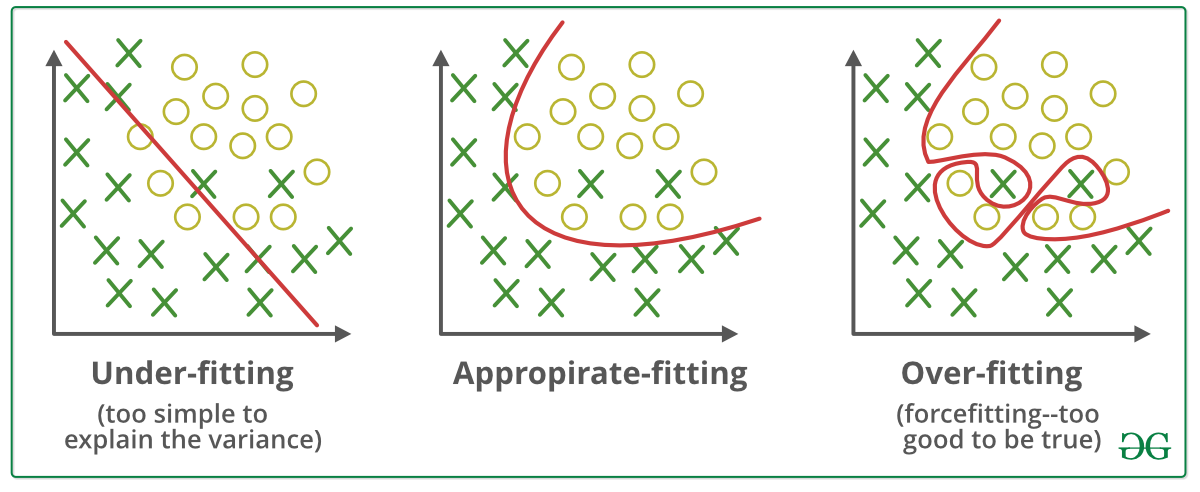

### Lineare Regressie <a class="anchor" id="lineare-regressie"></a>
$y = ax + b $  
x is hierbij de input variabele /  voorbeeld  
y is hierbij de output variabel / doel  

Afstand tussen 2 punten wordt bepaald met bijvoorbeeld ***K-Nearest Neighbors (KNN)***

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


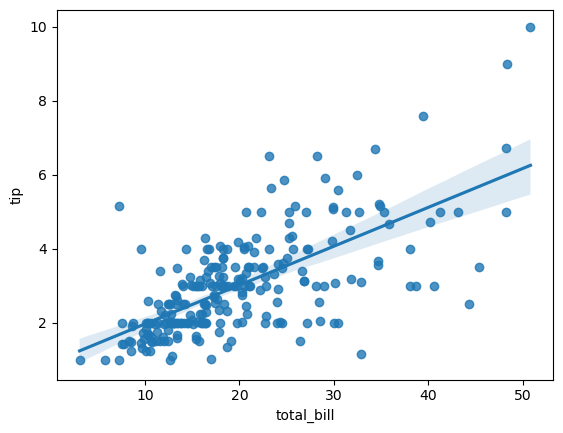

In [3]:
tips = sns.load_dataset('tips')
sns.regplot(x='total_bill', y='tip', data=tips);
tips.head()

### KNN <a class="anchor" id="knn"></a>
Vind de k dichtbijzijnste buren tot i. 
Bij een regressie zijn dit getallen.  
Bij een classificatie zijn dit labels.

`def knn(neighbours,i,k=5):`

In [4]:
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris= datasets.load_iris()

X,y= iris.data, iris.target

X_train, y_train = np.random.default_rng().choice(X, 90, axis=0),  np.random.choice(y,90)
X_test, y_test = np.random.default_rng().choice(X, 60, axis=0), np.random.choice(y,60)

In [5]:
from scipy.stats import mode
from scipy.spatial.distance import euclidean


def knn(X,y,example,k=5):
    '''Classify example using euclidean distance to calculate the k closest items in X with labels y.'''
    kNN_Y = y[np.argsort([euclidean(example, node) for node in X])[:k]]
    return kNN_Y

knn_values = knn(X_train, y_train, X_test[1])
print(knn_values)

[0 2 1 0 1]


### Euclidean Distance <a class="anchor" id="euclidean-distance"></a>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/55/Euclidean_distance_2d.svg/600px-Euclidean_distance_2d.svg.png)

### $$ \sqrt{\Sigma_i (p_i-q_i)^2}$$
Hierbij is i het aantal dimensies
Dus de afstand tussen p en q is dus gewoon de lengte van $p - q$

### $$ \sqrt{ (12-15)^2 + (5-9)^2)}= \sqrt{ 3^2 + 4^2)}= \sqrt{9+16}=\sqrt{25}=5$$
Wordt in code
`` distance.euclidean([12,5],[15,9]) ``

### Similariteit en afstand zijn sleutelbegrippen in ML <a class="anchor" id="similariteit"></a>

* Objecten zijn dicts: verzamelingen attribuut waarde paartjes.
* Het is duidelijk wanneer 2 item **hetzelfde zijn**. Dit is wanneer de similariteit 1 is.
* Als similariteit  tussen 0 en 1 ligt:   afstand = 1 - similariteit.

Een voorbeeld van een object:
`{'sex':'M', 'lengte': 193, 'gewicht': 73, 'opleiding': 'informatiekunde}`


Het is makkelijker om de similariteit te berekeken als de waarde numeriek zijn.

### Evaluatie
Lineare regressie kunnen we evalueren door:
* $RMSE$ of $MSE$ (zo laag mogelijk)
* $R^2$ (zo hoog mogelijk)  

Beide maten kunnen gebruikt worden om error testen

### $$RMSE = \sqrt{\sum_{i=1}^{n} \frac{(y_i-\hat{y})^2}{n}} $$

* $y$ is de vector met true waardes
* $\bar{y}$ is het gemiddelde over alle waardes in $y$
* $\hat{y}$ is de vector met voorspelde waardes (even lang als $y$).

### $$ R^2=1- \frac{SSR}{SST} = 1 - \frac{\sum(\hat{y}_i-{y}_i)^2}{\sum(y_i-\bar{y})^2}$$

In [6]:
def rmse(predicted,true): ## u, v are 1D arrays of the same length
    if len(predicted) == len(true):
        return np.sqrt(np.mean([(true[i] - predicted[i])**2 for i in range(len(true))]))

rmse([2,3,5,6,7,34],[2,3,5,6,7,34])

0.0

In [7]:
def rsquare(predicted, true):
    SS_res = sum((np.array(true) - np.array(predicted))**2)
    SS_tot = sum((true - np.mean(true))**2)
    
    if SS_tot == 0:
        return 0    
    return 1 - SS_res / SS_tot

rsquare([2,3,5,6,7,34],[2,3,5,6,7,34])

1.0

### Normaliseren & Standaardiseren 
Normaliseren en standaardiseren wordt de data in dezelfde vorm gezet. Dit kan op verschillende manieren gedaan worden. 

z-score =  elke kolom krijgt een gemiddelde van 0 en de standaard deviatie wordt 1.
$$ z-score =  \frac{x - \mu}{\sigma} $$
Hierbij is $\mu$ het gemiddelde en $\sigma$ de standaard deviatie

```
def standardize(M):
    return (M - np.mean(M, axis=0)) / np.std(M, axis=0)
    
         or
         
preprocessing.StandardScaler().fit_transform(X)
```

Bij Normaliseren worden alle waardes in dezelfde unit gezet. Hierbij is de lengte van twee vectoren gelijk aan 1. $\sqrt{v \cdot v} = 1$. Bij het normalizeren wordt de volgende formule gebruikt:
$$ X_{normalize} = \frac{X - X_{minimum}}{X_{minimum} - X_{minimum}} $$
 
```
def normalize(X):    
    norms = np.reshape(np.linalg.norm(X, axis=1), (X.shape[0],1))
    return X / norms
    
         or
         
preprocessing.Normalizer().fit_transform(X)  
```

# Week 2 <a class="anchor" id="week2"></a>
## Unsupervised learning

Er worden 2 vormen van Unsupervised learning aangehouden.
1. Groeperen/clusteren
    * K-means
    * Agglomarative clustering
    * DBSCAN
2. Versimpelen
    * PCA
    * Matrix factorisatie

Bij het groeperen worden de volgende stappen gebruikt om orde aan te brengen:
1. Bepaal de eisenschappen
2. Bepaal de waardes van deze eigenschappen
3. Leg soort bij soort op basis van similariteitsscore

Hierbij is k de aantal een groepen. Er is geen overlap tussen de groepen en elk element zit in een groep (partitie)
Je bent klaar als alles in een groep zit en er bij de herschikken niks veranderd.

```
KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
```

Omdat er in het begin een random groepjes worden gemaakt, is 1 start beter dan de andere.  
Om te vinden welke start beter is wordt er gekeken naar welke sum of variance het kleinste is.  
Sklearn doet het algoritme hierom 10x en pakt de beste.


### Argmax

De argmax van een dict $D$ is dat element in $D$ (die sleutel) met de hoogtste waarde in $D$.  
Hierbij wordt er bij argmax dus de index gepakt met de hoogste waarde.

```
a = array([[10, 11, 12],
           [13, 14, 15]])
       
np.argmax(a)
>> 5
```

### Formules uit assignment 2

> **Z-transform or standard Scaler:**
> $$ \frac{x - mean(x)}{sd(x)} $$
> the Standard Scaler assumes that the data within each feature follows a normal distribution, and it transforms the data to have a mean of 0 and a standard deviation of 1 by centering the distribution around 0 and removing the mean.



> **Normalize:**
> $$ \frac{x - x_{min}}{x_{min} - x_{min}} $$
> Samples that contain at least one non-zero component are independently rescaled so that their norm, or magnitude, is equal to one.

> **Min Max:**
> $$ \frac{x - x_{min}}{x_{max} - x_{min}} $$
> The min-max scaling technique adjusts the values of each feature to fall within a specified range.


> **Robust:**
> $$ \frac{x - Q_1(x)}{Q_3(x) - Q_1(x)} $$
> The Robust Scaler is a feature scaling method that is resilient to outliers in the data. It is similar to the MinMax Scaler, but instead of using the minimum and maximum values, it employs the interquartile range (IQR). The median and scales of the data are adjusted based on the quantile range, which makes it robust to outliers.

### Andere manieren van clusteren
Er kan ook hierarchisch geclusterd worden. Hierbij kan dit bottom up of top down gedaan worden.  
Bij top down wordt er begonnen met 1 giga cluster die steeds kleiner wordt gemaakt door het op te breken.  
Bij bottom up begint elke waarde in zijn eigen cluster. Elke cluster wordt samengevoegd met een andere cluster die er veel op lijkt.

### top down
![](https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Hierarchical_clustering_simple_diagram.svg/418px-Hierarchical_clustering_simple_diagram.svg.png)

### bottom up
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/12/Iris_dendrogram.png/440px-Iris_dendrogram.png)

### Afstand tussen 2 clusters
1. Ward: Hierbij worden clusters samengevoegd zodat de variantie het kleinst blijft
2. Average: Hierbij worden clusters samengevoegd waar de gemiddelde afstand het kleinste is
3. Complete: Hierbij worden clusters samengevoegd waar de maximale afstand het kleinste is

Bij agglomerative clustering kan hier dus een van de volgende manieren clusters gevorm worden.
```
X = np.array([[1, 2], [1, 4], [1, 0],
              [4, 2], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(linkage="Ward, Average or Complete").fit(X)
```

### DBscan
"Poor man algoritme" omdat er geen labels gemaakt hoeften te worden.

Bij DBscan worden er clusters gevormd op basis van hoe dicht notes bij elkaar staan. Hierbij is het voordeel dat er geen $k$ berekend hoeft te worden.  

De ruimte is opgedeeld in *dense regions* waar de core points in zitten.  
Een core point is een node waarbij de het aantal connecties met andere nodes groter of gelijk is aan de vastgestelde minimum. Hierbij kan er een verbinding gemaakt worden met een andere core point of een border point.  

Een border point zit wel in het cluster maar voldoet niet aan de vastgestelde minimum eisen.

Noise points zitten niet vast aan een cluster.

![](https://miro.medium.com/v2/resize:fit:720/format:webp/1*IjGsqmxCUQ91-5jy7FT62w.png)

Het aantal clusters wordt bepaald door de data en het algoritme.  
De clusters overlappen niet maar er kan wel zijn dat een point in twee clusters kan horen. Om dit op te lossen wordt er een tiebreaker gebruikt.

### Data versimpelen
Door het versimpelen van de data worden de aantal dimensies verminderd. Of te wel de lengte van de vectoren. Dit kan door 2 technieken gedaan worden:
1. PCA (principal component analysis)
2. NMF (Matrix factorisatie)
Het voordeel hiervan is:
* Visualisatie
* Data compressie waardoor het sneller gaat
* Meer informatie representatie, door het weghalen van de noice.

```
# Import library
from sklearn.decomposition import NMF, PCA
```


PCA:
```
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
pca.fit_transform(X)
```

NMF:
```
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(X)
```

### Voorbeeld van PCA

In [8]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

from sklearn.decomposition import PCA
# keep the first two principal components of the data 
pca = PCA(n_components=2)
# fit PCA model to breast cancer  data 
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape))) 
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


In [9]:
# Even checken

X_pca[:5] # 569 voorbeelden, met steeds 2 features=dimensies

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       [ 7.1229532 , 10.27558912],
       [ 3.93530207, -1.94807157]])

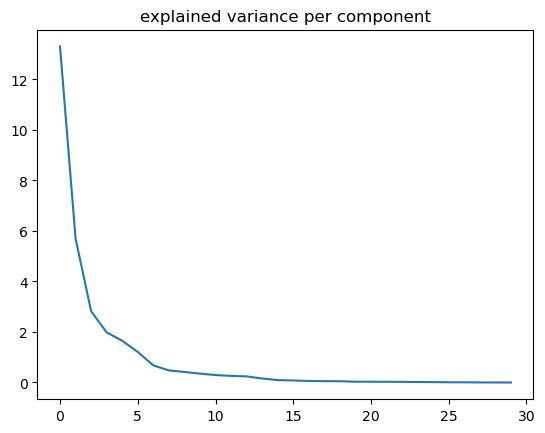

In [10]:
# make all principal components
# order them and plot the eigenvalues, explained variance,, per component
pca_all = PCA(n_components=30)
pca_all.fit(X_scaled)
pd.Series(pca_all.explained_variance_).plot(title='explained variance per component');

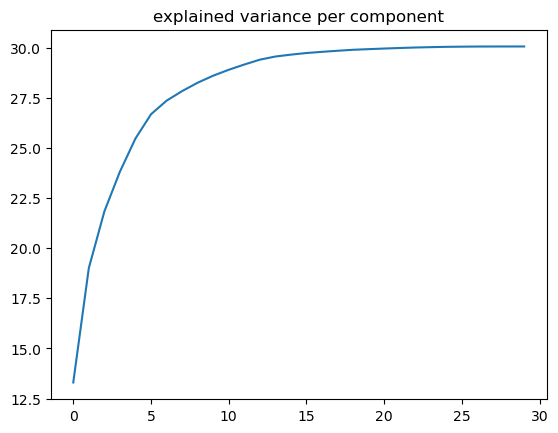

In [11]:
# cumulative plot
pd.Series(pca_all.explained_variance_).cumsum().plot(title='explained variance per component');

# Week 3 <a class="anchor" id="week3"></a>
## Evaluatie

Bij Evaluatie kijk je hoe goed je geleerde (getrainde) model generaliseert naar nieuwe voorbeelden.  
Hierbij is een model goed gegeneraliseerd, als het een accurate voorspelling kan maken op nog niet geziende data.  
Je moet dus niet gaan testen op voorbeelden die je al gezien hebt.  

Als je gaat test op je training data kan het voorkomen dat er over-fitting plaatst vind en het algoritme niet goed werkt op nieuwe voorbeelden.  

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

Soms wordt er ook een validatieset gemaakt waarop de hyperparameters getest kunnen worden.


### 2 class confusion matrix
![](https://www.researchgate.net/profile/Xiaoxuan-Liu-9/publication/339224791/figure/fig2/AS:859521383673858@1581937275642/Overview-of-confusion-matrix-contingency-table-Differences-in-nomenclature-for-machine.jpg)

Hierbij is:
* TP: Het aantal als spam aangegeven mails die wel spam zijn
* FP: Het aantal als spam aangegeven mails die niet spam zijn.
* FN: Het aantal als niet spam aangegeven mails die wel spam zijn.
* TN: Het aantal als niet spam aangegeven mails die niet spam zijn.

X-as is de echte waarde  
Y-as is de voorspelde waarde  

* Accuracy: laat een percentage zien van hoeveel van de voorspellingen goed zijn. Hierdoor mis je wel het gehele plaatje.
* Recall: Hoeveel van de spam heb je als spam gemeld.
* Precision: Hoeveel van de als spam gemelde mails zijn ook echt spam.
* F1 score: Is een score dat Recall en Precision samenvoegd. Het wordt ook wel het harmonisch gemiddelde genoemd. 

$$ Recall = \frac{TP}{TP + FN} $$  
$$ Precision = \frac{TP}{TP + FP} $$  
$$ Accuracy = \frac{Totaal goed voorspelde}{Alles} $$  
$$ F1 score = 2 * \frac{Precision * Recall}{Precision + Recall}$$

Accuracy is een goede matrix als je een gelijke distributie hebt over de classes. Hierbij klinkt een percentage van 99% erg goed, maar er kunnen nog haken en ogen aan zitten. De verdeling moet dus wel goed liggen

### Multiclass confusion matrix
$$ Recall = \frac{|Diagonaal|}{|Kolommen|} $$  
$$ Precision = \frac{|Diagonaal|}{|Rijen|} $$  
$$ Accuracy = \frac{|Diagonaal|}{|Totaal|} $$

### f1-score
* Marco mean: Elke class is gelijk
* Weighted mean: Weging op basis van de hoeveelheid
* Micro mean: diagonaal / alles


* Accuracy: ```return sum(np.diag(confusion_matrix)) / confusion_matrix.sum()```
* Mirco: ```return accuracy(confusion_matrix)```
* Macro ```return np.mean(precision)```

              precision    recall  f1-score   support

         Cat      0.308     0.667     0.421         6
        Fish      0.667     0.200     0.308        10
         Hen      0.667     0.667     0.667         9

    accuracy                          0.480        25
   macro avg      0.547     0.511     0.465        25
weighted avg      0.581     0.480     0.464        25



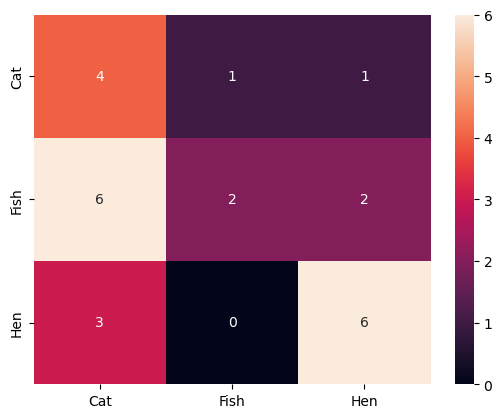

In [12]:
from sklearn import metrics

# Constants
C="Cat"
F="Fish"
H="Hen"

# True values
y_true = [C,C,C,C,C,C, F,F,F,F,F,F,F,F,F,F, H,H,H,H,H,H,H,H,H]
# Predicted values
y_pred = [C,C,C,C,H,F, C,C,C,C,C,C,H,H,F,F, C,C,C,H,H,H,H,H,H]

# Print the confusion matrix
import seaborn as sns
%matplotlib inline
sns.heatmap(metrics.confusion_matrix(y_true, y_pred), annot=True,
           xticklabels=[C,F,H],yticklabels=[C,F,H] );

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_true, y_pred, digits=3))

### Baseline
Een baseline is een classifier die "geleerd" is op basis van globale informatie. Hierbij is het gebaseerd op een vooroordeel.
Als je baseline hetzelfde is als je test dan is je test waardeloos. Globale infomatie is dan beter dan een dure algoritme.

3 vormen van baseline:
1. Random: met C aantal klasse. Hierbij heeft elke klasse $\frac{1}{C}$ kans.
    * ```return np.random.randint(np.unique(input_labels)[-1] + 1, size=test_size)```
2. Weigted random: met C aantal klasse. Hierbij heeft elke klasse een kans op basis van de groote van de kans.
    * ```return np.random.choice(labels[-1] + 1, size=test_size, p=weighted)```
3. Majority class: De klasse waarvan het meeste zijn wordt gekozen als baseline.
    * ```return np.tile(mode(input_labels)[0], test_size)```
    
Voor een baseline bij een regressie kan er gebruikt worden gemaakt van mean, modus, mediaan. Hierdoor krijg je een rechte lijn.

### Optimalisatie / loss functie
We kiezzen de regressielijn waar de errors het kleinste zijn. Je leert een model waarbij de loss op de train voorbeeld minimaal is. Maar vaak is de echte loss functie een combinatie van de errors en de regularisatie.

### RMSE en $R^2$
* RMSE is een error maat. Hoe lager hoe beter. De grote verschillen worden hierodoor uitvergroot. 
* $R^2$ verklaart de variantie. Hierbij wil je dit zo hoog mogelijk hebben

### Cross validatie
![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/2560px-K-fold_cross_validation_EN.svg.png)

Bij cross validation wordt er gekeken welke waarde van bijvoorbeeld k het beste werkt binnen de modellen.
Een gestructureerde manier om een hele hoop combinatie van mogelijke hyperparameters uit te proberen.
Significatie toesten en stake proeven. Is jouw $R^2$ echt hoger?

$$  \mu \pm \frac{\sigma}{\sqrt{k}} $$

--------------------------------------

# Week 5 <a class="anchor" id="week5"></a>
## Supervised machine learning: linear regression

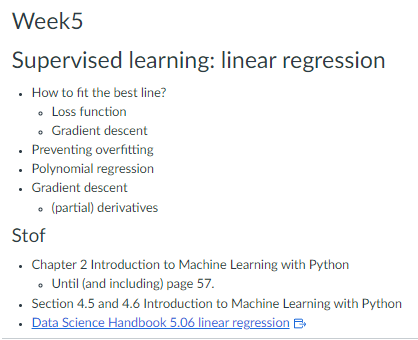

### Wat is Regressie? <a class="anchor" id="regressie"></a>
"Het vinden van de beste lijn"  
We willen het lineaire model vinden dat de regressie verklaart. Dus de lijn die de beste y geeft op basis van de x



Als x een dimensie heeft willen we de intersectie $a$ en de helling $b$ vinden zo dat $ y = a + bx $ de beste $y$ terug geeft
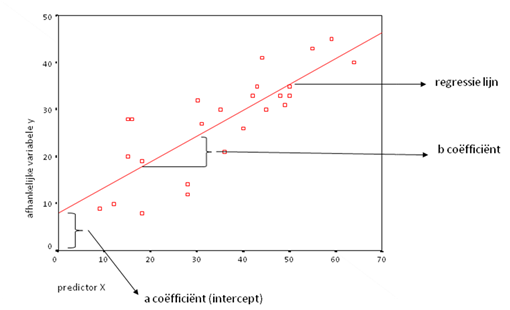

Als er meerdere dimensies zijn willen we de beste hyperplane vinden voor:
    $$ y= w_0 + w_1x_1 + w_2x_2+ ....w_nx_n$$
    
![](https://online.stat.psu.edu/onlinecourses/sites/stat508/files/lesson02/image_01.gif)

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


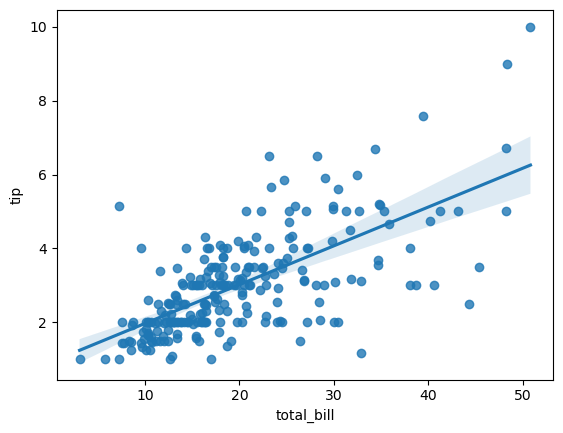

In [13]:
tips = sns.load_dataset('tips')
print(tips.shape)
sns.regplot(x='total_bill', y='tip', data=tips);
tips.head(2)

### De beste lijn vinden <a class="anchor" id="bestelijn"></a>
Om de beste lijn te vinden willen we dus weten waar de gegeven $x$ de beste $y$ terug geeft.
We kunnen dit berekenen door de MSE te nemen van alle punten. We willen variabelen waar de MSE het laagste is.

![](https://miro.medium.com/max/1222/1*jopCO2kMEI84s6fiGKdXqg.png) 

In [14]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

def mse(predicted,true): ## u, v are 1D arrays of the same length
    if len(predicted) == len(true):
        return np.mean([(true[i] - predicted[i])**2 for i in range(len(true))])

print(f"self MSE: {mse(y_true, y_pred)} ")


from sklearn.metrics import mean_squared_error
print(f"sklearn MSE: {mean_squared_error(y_true, y_pred)}")

self MSE: 0.375 
sklearn MSE: 0.375


Om deze variabelen te vinden maken we gebruik van de afgeleiden.
We willen een functie die het beste is op de nieuwe data en dus niet overfit.


> * $f(x) = 2x^2 + 4x -6$.
> * Then the **derivative** is $f'(x)= 4x+4$.
> * Now find at which $x$, $f'(x)=0$. That is the minimal point of a quadratic function.
> * Thus $4x+4=0$ exactly when $x=-1$. And at that point $y=f(x)= 2(-1)^2+ 4\cdot -1 -6$. That equals $-8$.

<img src="https://www.mathportal.org/math-tests/quadratic-equation-tests/graph-and-discriminant/1-2.png" alt="drawing" width="400"/>

### Data transformatie <a class="anchor" id="data_transformatie"></a>

De beste lijn: 
* geeft het beste resultaat op de data
* Is een goede generalisatie op nieuwe data
* Is niet overfit op de train data

Om overfitten te voorkomen is het van belang om de grote gewichten te voorkomen. Je wilt standaardizeren zodat ieder gewicht even veel meetelt.

Verschillende manieren om grote gewichten te voorkomen:
* sum of weights (regularizatie) toevoegen aan de lost functie
* take *absolute values* : **lasso** or **l1** regularization $ \lambda \sum |w_i|$
* take *squared values*: **ridge** or **l2** regularization $\lambda \sum w_i^2.$

Regressie werkt goed as de variabelen normaal verdeeld zijn.  
Dit kan gedaan worden door:
* log transformatie
* z transformatie

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/89/Log-normal-pdfs.png/600px-Log-normal-pdfs.png" alt="drawing" width="400"/>

```python
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
                                                                        
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)
```

(+ 1 om delen door nu te voorkomen)

### Algoritme stappen <a class="anchor" id="algoritme_stappen"></a>
1. Je kiest een leermanier / model
2. **Je kiest de hyperparameters om de leermanier te beïnvloeden**
3. Je fit het model door gebruik te maken van ``fit()``
    * Hier leer je de _vrije parameters_ van het model uit de (trainings) voorbeelden.
4. Je past het model toe op nieuwe data
    * Voor supervised learning maken we gebruik van ``predict()`` 
    * Voor unsupervised learning maken we gebruik van ``transform()`` of ``predict()`` 
   

### Grid search <a class="anchor" id="grid_search"></a>
Om de hyperparameters uit te proberen wordt er gebruik gemaakt van een grid search. Bj een grid worden er 2 of meerdere parameters met elkaar vergeleken.  
Om dit uit te voeren wordt de test data gesplitst in een test set en een validatie set. De validatie set wordt gebruikt bij de grid search. Op deze manier kan de data niet alvast getraint worden op de test set. Anders krijg je een algoritme dat te goed werkt op de test data.

```python
alpha_options = [0.1, 1.0, 10.0]


results = {'ridge': [], 'lasso': []}

for alpha_option in alpha_options:
    ### BEGIN SOLUTION
    lasso_model = Lasso(alpha=alpha_option)
    ridge_model = Ridge(alpha=alpha_option)

    # Fit the models
    lasso_model.fit(X_train_scaled, y_train)
    ridge_model.fit(X_train_scaled, y_train)
    results['ridge'].append(r2_score(y_val, ridge_model.predict(X_val_scaled)))
    results['lasso'].append(r2_score(y_val, lasso_model.predict(X_val_scaled)))
    ### END SOLUTION
scores_dataframe = pd.DataFrame(results)
scores_dataframe.index = alpha_options

scores_dataframe
````

### Cross validation <a class="anchor" id="cross_validation"></a>
Bij cross validation paken we een validatieset. Bij elke test pakken wij een ander deel van de gehele data.
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1920px-K-fold_cross_validation_EN.svg.png" alt="drawing" width="600"/>

```
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
```

### Gradient descent <a class="anchor" id="gradient_descent"></a>
is een manier om snel de beste regressie lijn te vinden. Hierbij is de mse het laagste.
We beginnen ergens en kijken naar de afgeleiden. Als dat 0 is zijn we klaar.

Stappen van Gradient descent:
1. We pakken een random $x$
2. We berekenen de waarde van $x$ en de afgeleiden.
3. $x_{nieuwe} = x_{oude} - \alpha * f'(x) $
4. Ga zo door tot x niet meer veranderd

Zorg ervoor dat de alpha laag is *(default is 0.01)* anders springt het alle kanten op.
<img src="https://i.stack.imgur.com/w7Y3c.png" alt="drawing" width="600"/>

In [22]:
def step(x,alpha=.05): 
    '''Voor f(x)=4x**2 + 4x +1. '''
    gradient= 8*x +4
    return x - alpha * gradient

x=10
for _ in range(20):
    print(f"old x:{round(x,2)}, gradient:{round(8*x+4,1)}, new x:{round(step(x),2)}")
    x=step(x)

old x:10, gradient:84, new x:5.8
old x:5.8, gradient:50.4, new x:3.28
old x:3.28, gradient:30.2, new x:1.77
old x:1.77, gradient:18.1, new x:0.86
old x:0.86, gradient:10.9, new x:0.32
old x:0.32, gradient:6.5, new x:-0.01
old x:-0.01, gradient:3.9, new x:-0.21
old x:-0.21, gradient:2.4, new x:-0.32
old x:-0.32, gradient:1.4, new x:-0.39
old x:-0.39, gradient:0.8, new x:-0.44
old x:-0.44, gradient:0.5, new x:-0.46
old x:-0.46, gradient:0.3, new x:-0.48
old x:-0.48, gradient:0.2, new x:-0.49
old x:-0.49, gradient:0.1, new x:-0.49
old x:-0.49, gradient:0.1, new x:-0.5
old x:-0.5, gradient:0.0, new x:-0.5
old x:-0.5, gradient:0.0, new x:-0.5
old x:-0.5, gradient:0.0, new x:-0.5
old x:-0.5, gradient:0.0, new x:-0.5
old x:-0.5, gradient:0.0, new x:-0.5


```python
# To help you along, first implement one step of the gradient descent algorithm in the function `gradient_step` below
# using your df_dx and df_dy functions. The function should return a tuple with the new values for x and y
def gradient_step(x, y, learning_rate) -> Tuple[float, float]:
    x = x - (learning_rate * df_dx(x, y))
    y = y - (learning_rate * df_dy(x, y))
    return (x, y)
```

```python
def gradient_descent(learning_rate, max_num_steps)->Tuple[float, float]:
    """
This function implements the gradient descent algorithm for the function f defined above, given a float learning_rate 
and an integer max_num_steps. You can use the functions f, df_dx and df_dy that you created above. The function should 
return a tuple containing the optimal x value and the optimal y value.
    """
    steps = 0
    # we will give you some starting values for x and y
    x, y = 0.6, 0.5
    # Loop until we reach the maximum number of iterations or converge to a minimum
    while steps < max_num_steps:
        # Calculate the gradients of the function at the current x and y values
        x_new, y_new = gradient_step(x, y, learning_rate)
        # Check if the new values of x and y make the function increase
        if f(x_new,y_new) > f(x,y):
            break

        else:
            # Update the values of x and y
            x = x_new
            y = y_new

            # Increase the iteration counter
            steps += 1
    ### END SOLUTION
    return (x, y)
```

In [23]:
# We load in the dataset
tips = sns.load_dataset('tips')

def cost_function(m, b, x, y):
    """
    To find the best intercept and slope using gradient descent, 
    we need to define a cost function that measures how well our line fits the data.
    In this case, we can use the mean squared error (MSE) as our cost function:
    cost(m, b) = (1/N) * sum((y_i - (m*x_i + b))^2)
    """
    N = len(x)
    cost = (1 / N) * np.sum(y - (m * x + b) ** 2)
    return cost

# Define partial derivatives of cost function
def partial_m(m, b, x, y):
    N = len(x)
    dm = (-2 / N) * np.sum(x * (y - (m * x + b)))
    return dm

def partial_b(m, b, x, y):
    N = len(x)
    db = (-2 / N) * np.sum(y - (m * x + b))
    return db

* Dit hadden we toch ook gewoon direct kunnen uitrekenen?
* $8x+4=0 \Rightarrow 8x=-4 \Rightarrow x= - \frac{4}{8}=-.5$.
* Ja, hier wel, maar voor veel functies is dat helemaal niet zo direct of eenduidig.
* Dan is gradient descent een heel handig middel om dat minimum te vinden.

* Vind die $\theta$ zodat $$\frac{\sum( \theta \cdot x_i - y_i)^2}{n}$$ zo klein mogelijk is.
* we noemen dit de **loss functie** van theta. (ook wel **cost function**)
* de afgeleide is  (waarbij $e_i = \theta x_i - y_i$ de error, de fout,  gemaakt voor instantie $x_i$),
$$\frac{2\cdot\sum_{i=1}^{i=n} x_i\cdot e_i}{n}$$

* Met $n$ variabelen /features, hebben we deze regressie vergelijking

$$ \theta_0 + \theta_1x_1 + \ldots  \theta_nx_n = y.$$

* We moeten nu dus de optimale waardes vinden voor elke $\theta_i$.
* Dat doen we door **partiële afgeleides** te nemen, voor elke $\theta_i$.
    * je neemt dan de andere $\theta_j$ als constanten en 
    * dan  gaat het net zo als met 1 theta.

### Wat hebben we gedaan? Lineare Regressie <a class="anchor" id="afronding_regressie"></a>

1. Wat is het? Wat is het resultaat?
2. Wat is het optimalisatiecriterium? De loss/cost functie.
3. Hoe vinden we nou die beste lijn/hyperplane?
    * gradient descent
    
### Zij-onderwerpen

* Regularisatie: lasso en ridge
* hyperparameter tuning: grid search en cross validation
* Wat te doen als de data nou eenmaal "niet recht is"
    * Polynomials nemen van de input
    * combinaties van input feautues als nieuw feature
    * feature naar normaal verdeling transformeren.
    

# Week 6 <a class="anchor" id="week6"></a>
## Supervised machine learning: classification

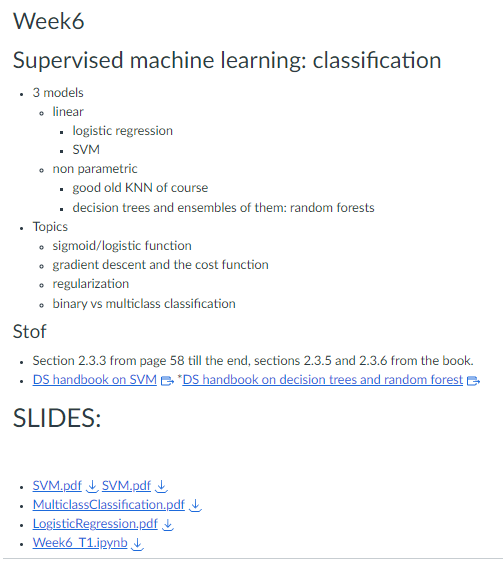

### Wat is classificatie:
* Gegeven de waardes van een item, er een label aan toe kennen, gebaseerd op een gecategoriseerde waarde. Dit kan boolean zijn of een multiclass.

* Een simpel model is bijvoorbeeld KNN. Je kijkt naar de k dichtsbijzijnde al geziende voorbeelden en kijkt welke klasse het meest voorkomt, en voorspel deze dan. 

* De evaluatie kan gedaan worden op precision, recall en de confusion matrix.

# Classificatie is het geven van een niet numerieke waarde als een label

### Verschillende modellen:
**Niet parametrisch:**
* Maken geen aanname op de vorm van de data
* KNN
* beslisbomen

**Linear:**
* "een rechte lijn" (hyperplane) kan de klassen van elkaar scheiden
* Naice Bayes, logistic regression, SVM

**Niet linear:**
* neurale netwerken

### Sigmoid of de logistic function
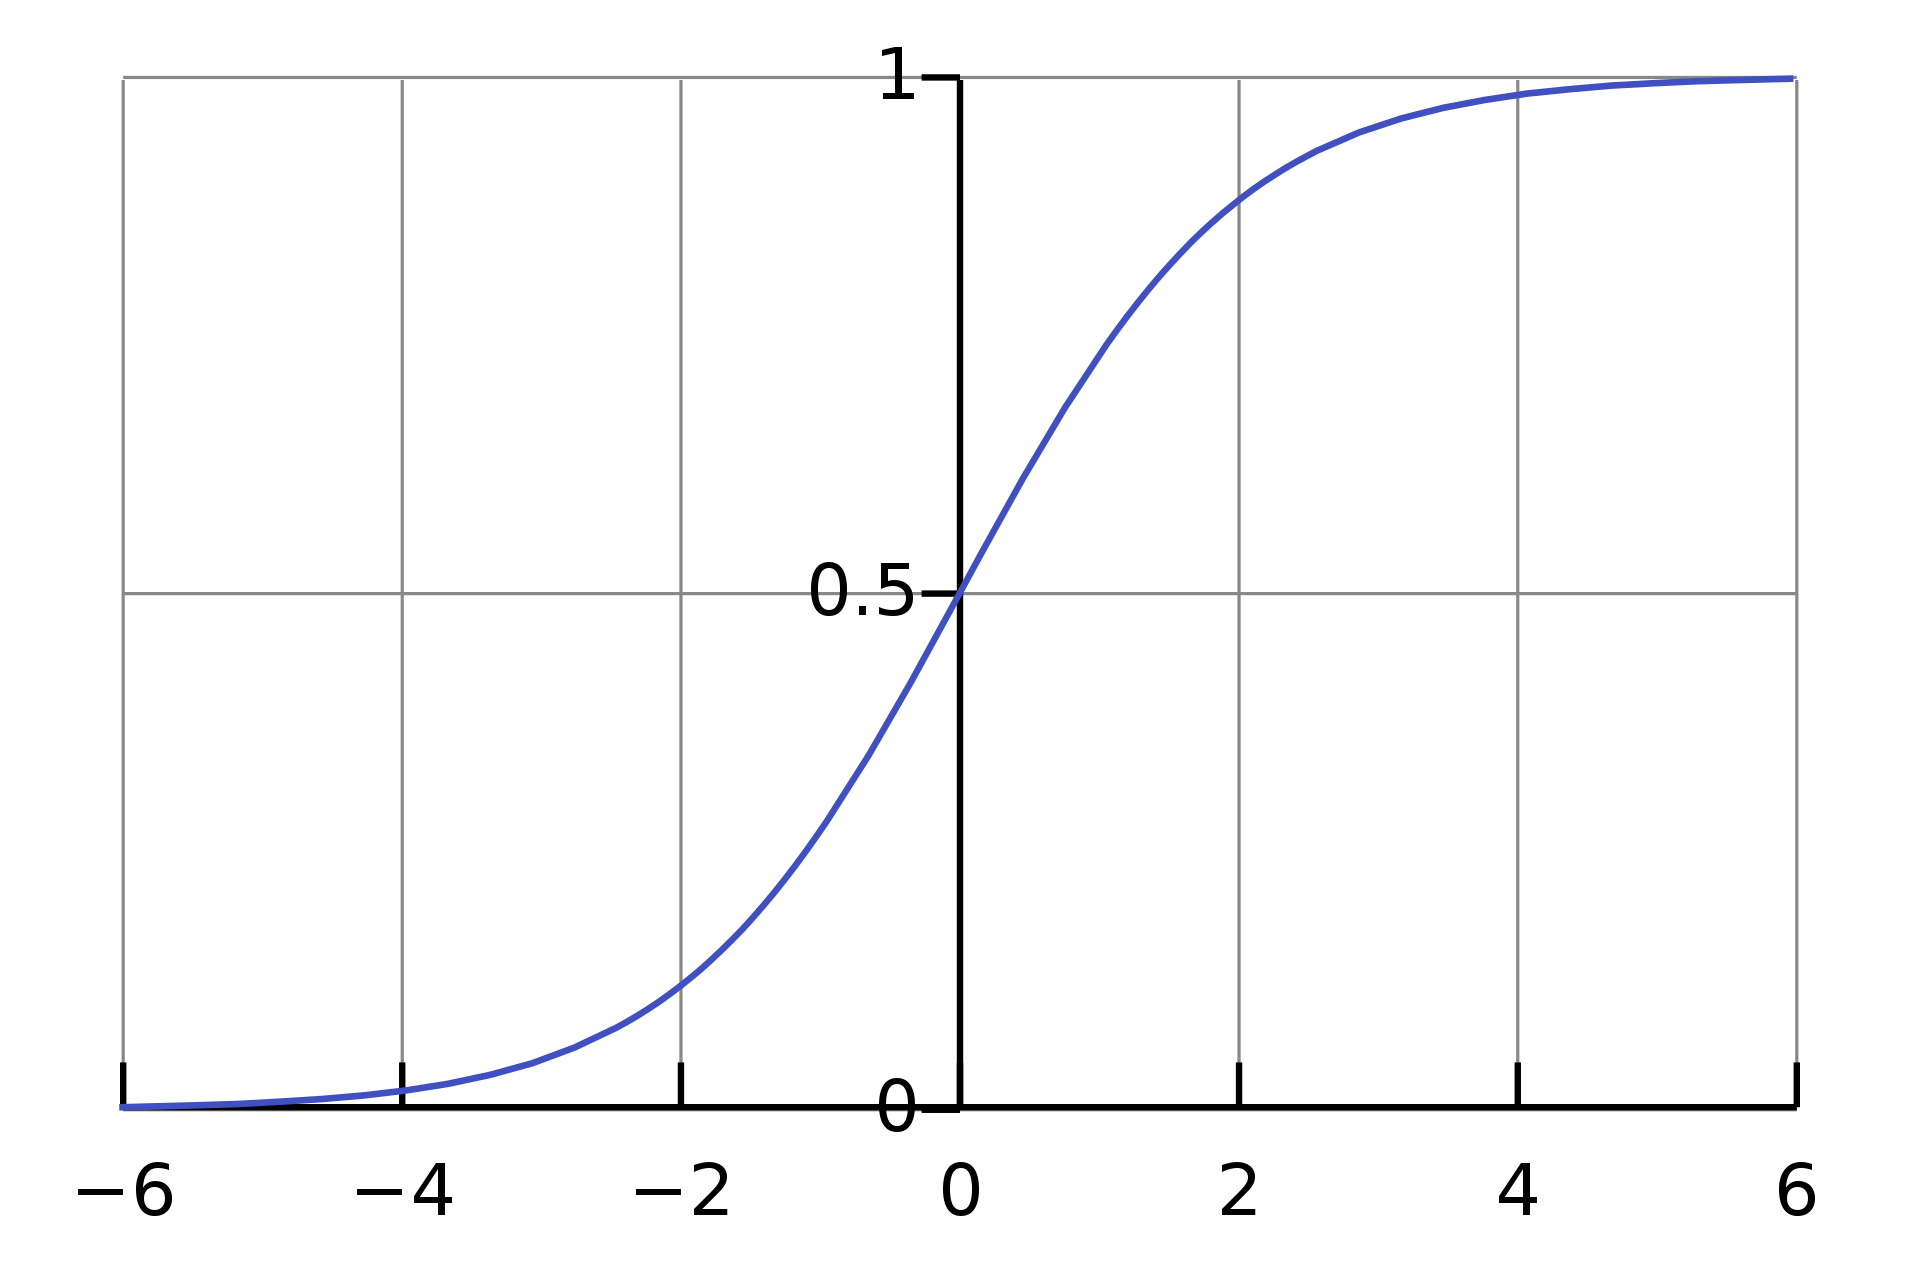

Hierbij krijg je als output de kans dat een item tot een bepaalde klasse hoort. De Sigmoid zit altijd tussen de 0 en 1.  
Het wordt gezien als kansberekening. Als een voorspelde waarde op 0.56 zit, is de kans dat het die waarde is 56%.

Waarbij een lineaire formule bestaat uit: $$g(\theta_{0} + \theta_{1} x )$$
Is een sigmoid functie: $$h_{\theta}(x) = \frac{1}{1 + e^{-(\theta_{0}+\theta_{1}x)}}$$

Bij meer variabelen veranderd de hoeveelheid dimensies.

#### Voorbeeld:
$$ h_{\theta}(size) = f(-1 + 0.5 * size) =  \frac{1}{1 + e^{-(1 + 0.5 * size)}}$$
$$ size = 4mm $$
$$ h_{\theta}(size) = 0.73 $$
Er bestaat een kans van 73% dat de tumor kwaadaardig is 

### Cost functie
Net als bij lineaire regressie kan er bij classificatie een cost functie berekend worden.  
Om de cost functie te berekenen hebben we de afgeleiden nodig van de convex.   
Van de non-convex kan er geen afgeleiden genomen worden aangezien er geen doorgaande lijn is.
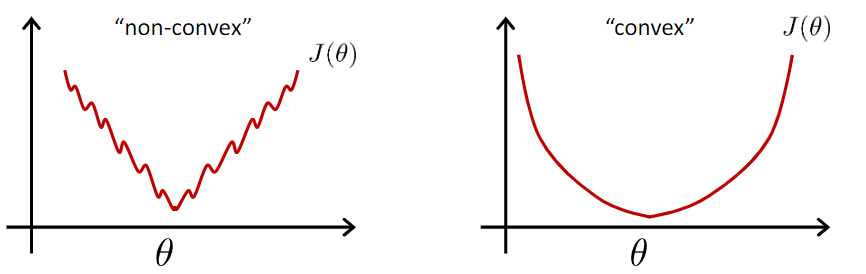

Als de voorspelling dichtbij de echte waarde is, dan is de cost laag. Is deze ver van de voorspelde waarde, dan is de cost hoog.



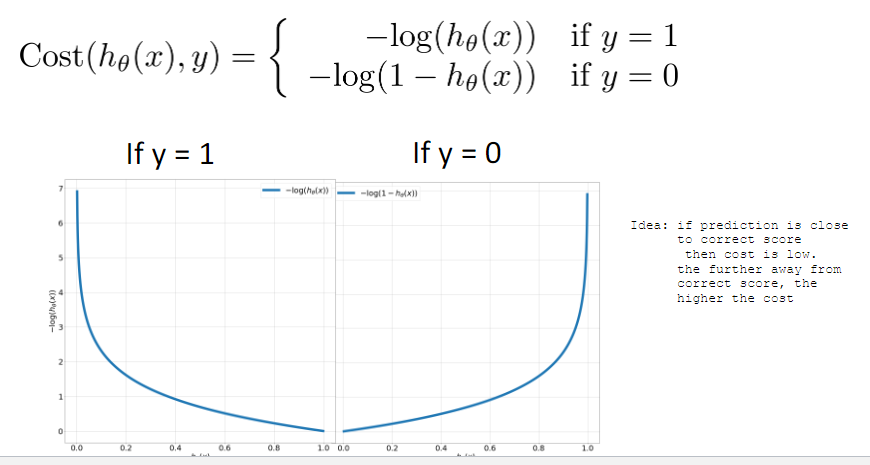

https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d

Naast de lineaire boundaries kan je ook niet lineaire boundaries hebben
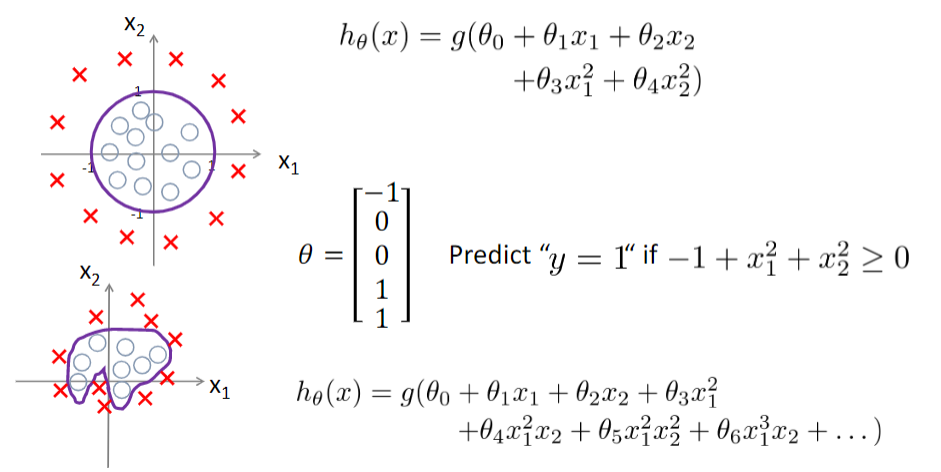

### Multiclass classificatie
Het simpelse is om de logistic regression op de delen in de hoeveelheid klasses die je hebt.
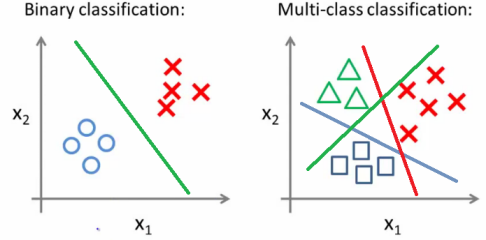

Een voorbeeld is om te bepalen of het buiten regent, sneeuwt, bewolkt of zonnig is.

### One vs. All (One-vs-Rest) 
Er wordt een model gemaakt per klasse, die wordt vergelijkt met alle andere klasses. Per klasse pak je een score en dan kies je de hoogste waarde. Er wordt gekeken naar welk model het sterkste is. Er wordt een kans terug gegeven dat test-item bij een klasse past.
Het nadeel hiervan is wel dat er voor elke klasse een model gemaakt moet worden. Iets wat bij meer klasses erg kan oplopen. 

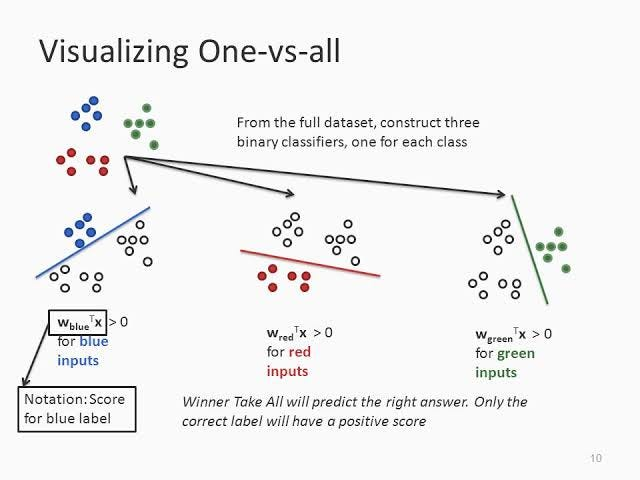

### Support vector machine (SVM)
Bij SVM wil je de afstand vanaf de lijn tot aan de punten zo groot mogelijk wordt. Bij het trainen willen we punten met de minste afstand tussen elkaar. Het model is alleen afhankelijk van deze punten.
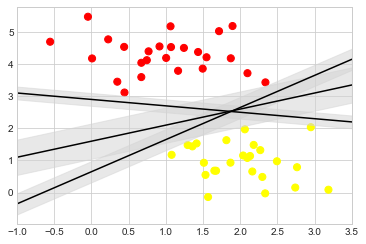

Het is wel een duurdere functie omdat trainen veel tijd kost. Maar voordeel is wel dat de uitkomsten beter zijn.

### Decision trees and random forest.
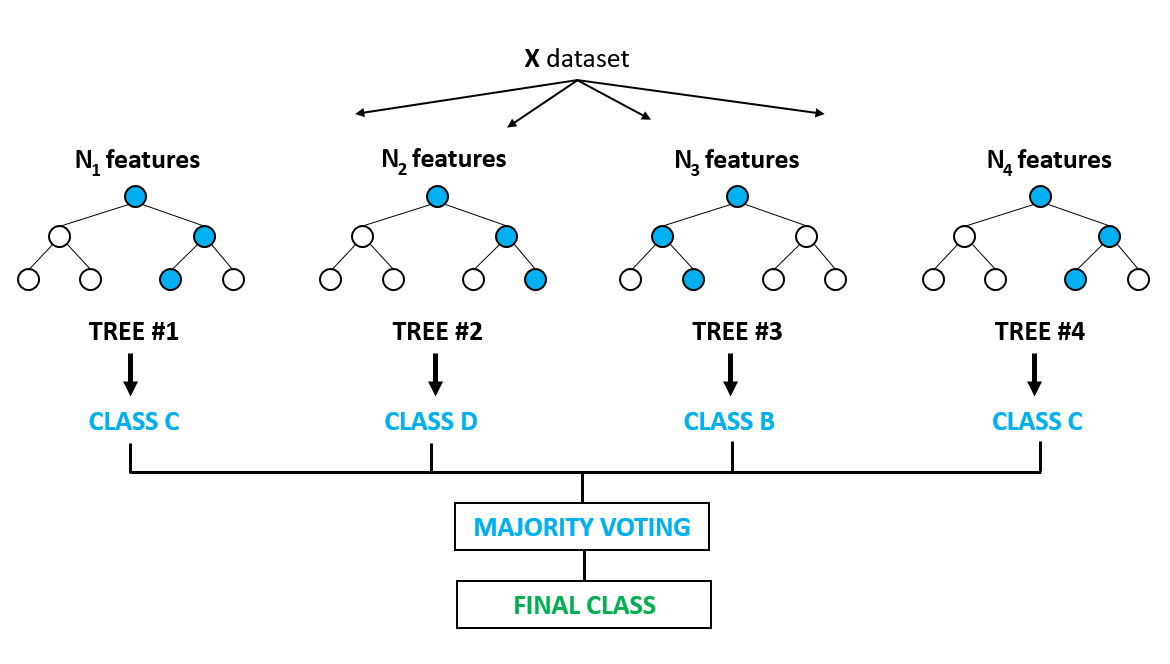

Op basis van splitsingen wordt er gekeken onder welke klasse een item valt. Als er wordt gekeken of iemand MBO, HBO of WO doet, kan een van de vragen zijn: "studeerd aan een universiteit". Het voordeel is dat er gee enkele aanname nodig is over de data. Het is namelijk erg intuitief, en ook makkelijk te begrijpen. We kijken naar waardes die lekker scheiden, zodat de minste stappen gemaakt hoeven te worden.

Overfitten kan wel snel voorkomen. Om deze reden wordt er in plaats van 1 boom een heel bos gebruikt. Een bos is als het waren meerdere beslissingsbomen. Er wordt majority class gebruikt op basis van alle bomen om te berekenen welke klasse bij een item hoort.

Random Forest is heel makkelijk, je hoeft namelijk vrijwil niks te trainen.   
XGBoost is een geoptimaliseerde random forest.

wanneer een model een accurate voorspelling kan maken op nog niet geziende data, kunnen we zeggen dat de test set een generalisatie is van de training set. 

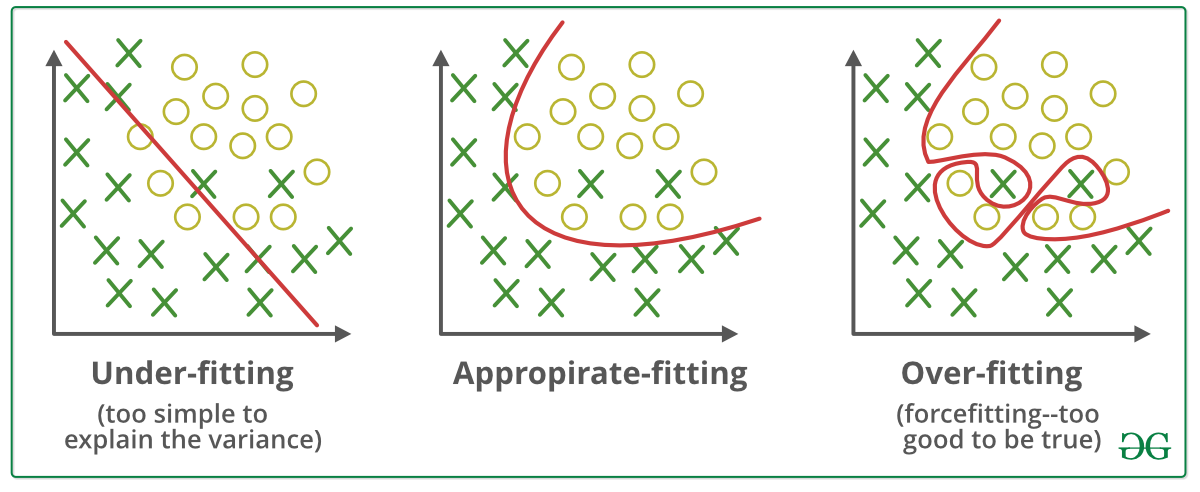

```python
random_forest = RandomForestClassifier().fit(X_train_scaled_and_encoded, y_train)
random_forest_prediction = random_forest.predict(X_test_scaled_and_encoded)
```

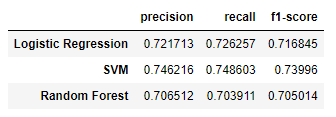

# Week 7 <a class="anchor" id="week7"></a>
## Neural networks & wrap up course